In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

from sklearn.ensemble import RandomForestRegressor

## Data Preprocessing

In [2]:
df = pd.read_csv('../Downloads/voter_turnout_merged_all_states.csv')
df.head()

,Residence_Addresses_City,elec_date,elec_year,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,voted_voters_asian,...,total_voters_college,total_voters_no_college,voted_voters_college,voted_voters_no_college,perc_turnout_college,perc_turnout_no_college,mean_age,voter_population,voted_voters,state
0,Oakland,2020_11_03,2020,General,30600.0,61476.0,37174.0,8628.0,83122,23041.0,...,80668,27989.0,71356,22543.0,88.456389,80.542356,47.829424,331652,172221,CA
1,Oakland,2018_11_06,2018,General,30600.0,61476.0,37174.0,8628.0,83122,14972.0,...,80668,27989.0,59248,17372.0,73.446720,62.067241,48.224196,331652,130249,CA
2,Oakland,2016_11_08,2016,General,30600.0,61476.0,37174.0,8628.0,83122,16057.0,...,80668,27989.0,60766,18951.0,75.328507,67.708743,46.819512,331652,135633,CA
3,Oakland,2014_11_04,2014,General,30600.0,61476.0,37174.0,8628.0,83122,8145.0,...,80668,27989.0,38216,10811.0,47.374424,38.625889,51.034918,331652,75153,CA
4,San Leandro,2020_11_03,2020,General,12705.0,5596.0,16028.0,2429.0,17780,9229.0,...,19051,10653.0,16014,8674.0,84.058580,81.423073,49.752550,70359,41879,CA


In [3]:
df.columns

Index(['Residence_Addresses_City', 'elec_date', 'elec_year', 'elec_type',
       'total_voters_asian', 'total_voters_black', 'total_voters_hispanic',
       'total_voters_others', 'total_voters_white', 'voted_voters_asian',
       'voted_voters_black', 'voted_voters_hispanic', 'voted_voters_others',
       'voted_voters_white', 'perc_turnout_asian', 'perc_turnout_black',
       'perc_turnout_hispanic', 'perc_turnout_others', 'perc_turnout_white',
       'FECDonors_TotalDonationsAmount', 'FECDonors_NumberOfDonations',
       'mean_donation', 'total_voters_$1000-14999',
       'total_voters_$100000-124999', 'total_voters_$125000-149999',
       'total_voters_$15000-24999', 'total_voters_$150000-174999',
       'total_voters_$175000-199999', 'total_voters_$200000-249999',
       'total_voters_$25000-34999', 'total_voters_$250000+',
       'total_voters_$35000-49999', 'total_voters_$50000-74999',
       'total_voters_$75000-99999', 'voted_voters_$1000-14999',
       'voted_voters_$100000-1

In [4]:
use_cols = ['Residence_Addresses_City', 'elec_type',
       'total_voters_asian', 'total_voters_black', 'total_voters_hispanic',
       'total_voters_others', 'total_voters_white',
       'FECDonors_TotalDonationsAmount', 'FECDonors_NumberOfDonations',
       'mean_donation', 'total_voters_$1000-14999',
       'total_voters_$100000-124999', 'total_voters_$125000-149999',
       'total_voters_$15000-24999', 'total_voters_$150000-174999',
       'total_voters_$175000-199999', 'total_voters_$200000-249999',
       'total_voters_$25000-34999', 'total_voters_$250000+',
       'total_voters_$35000-49999', 'total_voters_$50000-74999',
       'total_voters_$75000-99999', 
       'CommercialData_EstimatedHHIncomeAmount', 'total_voters_college',
       'total_voters_no_college', 'mean_age', 'voter_population', 'rcv', 'turnout']

In [5]:
rcv_cities = ['Albany', 'Berkeley', 'Eureka', 'Oakland', 'Palm Desert', 'San Francisco', 'San Leandro',
             'Las Cruces', 'Santa Fe', 'Boulder', 'Burlington', 'Portland', 'Takoma Park', 'Bluffdale',
             'Payson', 'Cottonwood Heights', 'Salt Lake City', 'Sandy', 'Midvale', 'Draper', 'Lehi',
             'Springville', 'South Salt Lake', 'Magna', 'Heber', 'Millcreek', 'Riverton', 'St. Louis Park',
             'Bloomington', 'Minneapolis', 'Minnetonka']
non_rcv_cities = list(set(df['Residence_Addresses_City']) - set(rcv_cities))

In [6]:
def label_rcv(row):
    if row['Residence_Addresses_City'] in rcv_cities:
        return 1
    else:
        return 0

In [7]:
#add rcv label
df['rcv'] = df.apply(lambda row: label_rcv(row), axis=1)

#add turnout column
df['turnout'] = df['voted_voters'] / df['voter_population']

#filter to usable columns (i.e. columns that do not show turnout)
df = df[use_cols]

#group by city and election type
df = df.groupby(['Residence_Addresses_City', 'elec_type'], as_index=False).mean()
df.drop(columns=['Residence_Addresses_City'], inplace=True)

df.head()

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_TotalDonationsAmount,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,...,total_voters_$35000-49999,total_voters_$50000-74999,total_voters_$75000-99999,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,voter_population,rcv,turnout
0,General,373.0,2410.0,2149.0,222.0,1462.0,177264.25,2978.00,59.454730,104.0,...,735.0,1438.0,1892.0,92631.54294,2256.0,1211.0,54.184656,12225.0,0.0,0.246299
1,General,227.0,292.0,4632.0,149.0,13767.0,1021160.00,12005.75,85.319570,673.0,...,3147.0,6387.0,3497.0,65781.06411,6591.0,4083.0,57.574886,23998.0,0.0,0.390408
2,Local_or_Municipal,227.0,292.0,4632.0,149.0,13767.0,441979.50,3063.75,149.988926,673.0,...,3147.0,6387.0,3497.0,65781.06411,6591.0,4083.0,61.541445,23998.0,0.0,0.090872
3,Consolidated_General,89.0,14.0,3492.0,57.0,4816.0,148876.25,1583.50,95.690915,443.0,...,1863.0,2595.0,738.0,71591.14161,3277.0,1616.0,56.419342,6810.0,0.0,0.433811
4,General,89.0,14.0,3492.0,57.0,4816.0,185602.25,2083.00,89.296205,443.0,...,1863.0,2595.0,738.0,71591.14161,3277.0,1616.0,51.515875,6810.0,0.0,0.741410


In [8]:
#examine data
df.describe()

,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_TotalDonationsAmount,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,total_voters_$100000-124999,...,total_voters_$35000-49999,total_voters_$50000-74999,total_voters_$75000-99999,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,voter_population,rcv,turnout
count,366.000000,356.000000,368.000000,366.000000,369.000000,3.690000e+02,369.000000,366.000000,361.000000,368.000000,...,367.000000,368.000000,368.000000,369.000000,369.000000,367.000000,369.000000,3.690000e+02,369.000000,369.000000
mean,2950.292350,1093.710674,7812.073370,1318.904372,24903.449864,3.691578e+06,25407.278455,109.803266,696.639889,4766.739130,...,2995.111717,6727.475543,6933.652174,105142.369960,15496.048780,5561.288828,53.586141,4.926078e+04,0.151762,0.387958
std,13234.716553,4699.375816,20873.069312,3569.094920,36106.675742,1.518253e+07,71067.868085,68.007615,1432.363087,8213.898331,...,6570.069225,11862.636194,10879.882636,29123.738326,27061.780591,9489.995134,4.108961,1.024822e+05,0.359277,0.273267
min,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000e+00,0.000000,20.735387,7.000000,1.000000,...,1.000000,1.000000,1.000000,32509.109090,2.000000,4.000000,37.837298,2.722000e+03,0.000000,0.000063
25%,156.250000,19.000000,530.000000,151.000000,8328.000000,2.057788e+05,2651.500000,66.408845,150.000000,971.000000,...,567.000000,1774.000000,2252.000000,85210.521810,4342.000000,1734.500000,50.804998,1.284800e+04,0.000000,0.179470
50%,434.500000,62.000000,1472.500000,365.000000,14635.000000,6.584295e+05,7225.750000,91.560301,331.000000,2390.000000,...,1255.000000,3801.500000,4004.000000,101947.099300,7719.000000,2887.000000,53.349100,2.266000e+04,0.000000,0.374304
75%,1193.750000,345.000000,5067.000000,1061.500000,27225.000000,2.118097e+06,19596.250000,127.739059,653.000000,5350.000000,...,2750.000000,6475.500000,6843.000000,122632.540400,15513.000000,4955.500000,56.570349,4.758300e+04,0.000000,0.515154
max,154854.000000,61476.000000,181747.000000,37173.000000,367189.000000,2.193126e+08,782637.750000,576.172630,10548.000000,94637.000000,...,54626.000000,94290.000000,118544.000000,214958.091500,277172.000000,83021.000000,67.607138,1.088768e+06,1.000000,2.119783


In [9]:
#checking rows with missing values
df[df['total_voters_black'].isnull()]

,elec_type,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_TotalDonationsAmount,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,...,total_voters_$35000-49999,total_voters_$50000-74999,total_voters_$75000-99999,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,voter_population,rcv,turnout
40,Consolidated_General,149.0,NaN,352.0,69.0,6629.0,106567.50,930.50,116.653782,52.0,...,104.0,596.0,2096.0,133471.94190,3130.0,1213.0,50.175491,7793.0,1.0,0.187155
41,General,149.0,NaN,352.0,69.0,6629.0,191183.00,1926.25,100.025856,52.0,...,104.0,596.0,2096.0,133471.94190,3130.0,1213.0,45.235569,7793.0,1.0,0.532369
49,Consolidated_General,104.0,NaN,524.0,56.0,8553.0,52464.50,906.75,58.257534,128.0,...,722.0,2859.0,2504.0,85182.42968,4105.0,2120.0,59.260059,13197.0,0.0,0.162272
50,General,104.0,NaN,524.0,56.0,8553.0,131077.25,1858.25,70.516525,128.0,...,722.0,2859.0,2504.0,85182.42968,4105.0,2120.0,53.415146,13197.0,0.0,0.420664
112,General,3.0,NaN,1.0,1.0,79.0,3731.00,51.75,102.184701,NaN,...,5.0,6.0,14.0,112915.25420,54.0,4.0,53.228005,22556.0,0.0,0.002402
113,Local_or_Municipal,3.0,NaN,1.0,1.0,79.0,4308.25,65.75,65.394531,NaN,...,5.0,6.0,14.0,112915.25420,54.0,4.0,56.512640,22556.0,0.0,0.001795
140,Consolidated_General,NaN,NaN,4.0,NaN,49.0,5384.00,82.50,65.260606,NaN,...,1.0,1.0,7.0,110444.44440,17.0,7.0,55.450973,9933.0,1.0,0.001183
141,General,NaN,NaN,4.0,NaN,49.0,11506.50,176.50,65.189908,NaN,...,1.0,1.0,7.0,110444.44440,17.0,7.0,54.332285,9933.0,1.0,0.002844
160,General,1.0,NaN,18.0,1.0,37.0,0.00,0.00,NaN,NaN,...,3.0,19.0,19.0,77780.52830,12.0,13.0,37.837298,23915.0,0.0,0.000836
226,General,NaN,NaN,1.0,1.0,4.0,0.00,0.00,NaN,NaN,...,NaN,1.0,NaN,139125.16670,2.0,NaN,55.435544,39494.0,0.0,0.000063


In [10]:
#dropping rows with incomplete data
df.dropna(inplace=True)
df.describe()

,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_TotalDonationsAmount,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,total_voters_$100000-124999,...,total_voters_$35000-49999,total_voters_$50000-74999,total_voters_$75000-99999,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,voter_population,rcv,turnout
count,355.000000,355.000000,355.000000,355.000000,355.000000,3.550000e+02,355.000000,355.000000,355.000000,355.000000,...,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,3.550000e+02,355.000000,355.000000
mean,3040.121127,1096.752113,8064.253521,1358.929577,25797.380282,3.835717e+06,26391.846479,111.085681,703.912676,4929.402817,...,3087.498592,6951.430986,7160.833803,105191.576577,16060.490141,5722.847887,53.601228,5.059086e+04,0.146479,0.398922
std,13428.742525,4705.657785,21207.560229,3616.737216,36519.368504,1.546209e+07,72282.398927,68.496981,1442.974788,8317.858366,...,6660.594903,12017.912660,11009.675268,28696.819689,27436.861876,9606.731976,3.987326,1.042509e+05,0.354085,0.270872
min,22.000000,1.000000,97.000000,22.000000,743.000000,1.520400e+04,332.250000,20.735387,7.000000,40.000000,...,55.000000,231.000000,228.000000,36935.871060,1279.000000,366.000000,40.656594,2.722000e+03,0.000000,0.041955
25%,164.000000,19.500000,653.000000,171.500000,8837.000000,2.278674e+05,2964.625000,67.058099,154.000000,1077.000000,...,607.500000,1924.500000,2344.500000,85337.874080,4714.500000,1821.000000,50.799581,1.340000e+04,0.000000,0.190707
50%,453.000000,62.000000,1562.000000,388.000000,14937.000000,7.069762e+05,7586.750000,92.007802,335.000000,2469.000000,...,1287.000000,3868.000000,4046.000000,101681.373500,8089.000000,2933.000000,53.327358,2.342700e+04,0.000000,0.381577
75%,1257.000000,345.000000,5114.500000,1126.500000,27408.500000,2.211608e+06,20351.125000,129.539313,655.500000,5569.500000,...,2783.500000,6542.000000,6989.000000,122608.815950,15861.000000,5519.500000,56.634865,4.765500e+04,0.000000,0.519995
max,154854.000000,61476.000000,181747.000000,37173.000000,367189.000000,2.193126e+08,782637.750000,576.172630,10548.000000,94637.000000,...,54626.000000,94290.000000,118544.000000,214958.091500,277172.000000,83021.000000,63.042398,1.088768e+06,1.000000,2.119783


In [11]:
#one-hot encode categorical cols
cat_cols = ['elec_type']

df = pd.get_dummies(data=df, columns=cat_cols)
df.head()

,total_voters_asian,total_voters_black,total_voters_hispanic,total_voters_others,total_voters_white,FECDonors_TotalDonationsAmount,FECDonors_NumberOfDonations,mean_donation,total_voters_$1000-14999,total_voters_$100000-124999,...,CommercialData_EstimatedHHIncomeAmount,total_voters_college,total_voters_no_college,mean_age,voter_population,rcv,turnout,elec_type_Consolidated_General,elec_type_General,elec_type_Local_or_Municipal
0,373.0,2410.0,2149.0,222.0,1462.0,177264.25,2978.00,59.454730,104.0,515.0,...,92631.54294,2256.0,1211.0,54.184656,12225.0,0.0,0.246299,0,1,0
1,227.0,292.0,4632.0,149.0,13767.0,1021160.00,12005.75,85.319570,673.0,647.0,...,65781.06411,6591.0,4083.0,57.574886,23998.0,0.0,0.390408,0,1,0
2,227.0,292.0,4632.0,149.0,13767.0,441979.50,3063.75,149.988926,673.0,647.0,...,65781.06411,6591.0,4083.0,61.541445,23998.0,0.0,0.090872,0,0,1
3,89.0,14.0,3492.0,57.0,4816.0,148876.25,1583.50,95.690915,443.0,756.0,...,71591.14161,3277.0,1616.0,56.419342,6810.0,0.0,0.433811,1,0,0
4,89.0,14.0,3492.0,57.0,4816.0,185602.25,2083.00,89.296205,443.0,756.0,...,71591.14161,3277.0,1616.0,51.515875,6810.0,0.0,0.741410,0,1,0


In [12]:
df['rcv'].sum()

52.0

## Model Implementation

In [15]:
#implement random forest
target = df['turnout']
data = df.drop(columns=['turnout'])

rf = RandomForestRegressor()
rf.fit(data, target)
print('Train accuracy: ', rf.score(data, target))

Train accuracy:  0.9489663128269937


In [19]:
#examine feature importance
feature_importance = list(rf.feature_importances_)
for i, feature in enumerate(list(data.columns)):
    print('Feature {} ({}) importance: {}'.format(i, feature, feature_importance[i]))
    

Feature 0 (total_voters_asian) importance: 0.01873112641079871
Feature 1 (total_voters_black) importance: 0.026635852131271405
Feature 2 (total_voters_hispanic) importance: 0.017107708974470146
Feature 3 (total_voters_others) importance: 0.011485898968483859
Feature 4 (total_voters_white) importance: 0.02831664576085577
Feature 5 (FECDonors_TotalDonationsAmount) importance: 0.045298145761116064
Feature 6 (FECDonors_NumberOfDonations) importance: 0.04308503700644571
Feature 7 (mean_donation) importance: 0.017640088130821446
Feature 8 (total_voters_$1000-14999) importance: 0.010324153576803241
Feature 9 (total_voters_$100000-124999) importance: 0.014528625137956946
Feature 10 (total_voters_$125000-149999) importance: 0.018726462715636532
Feature 11 (total_voters_$15000-24999) importance: 0.007165734152157797
Feature 12 (total_voters_$150000-174999) importance: 0.03906136275387652
Feature 13 (total_voters_$175000-199999) importance: 0.018991009327139378
Feature 14 (total_voters_$200000-24

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

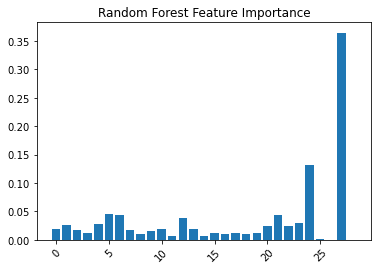

In [22]:
#plot feature importance
plt.bar(np.arange(len(list(data.columns))), list(rf.feature_importances_))
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)